In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
! pip install textblob

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 26.5 MB/s eta 0:00:00
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)


# Exploratory Data Analysis
We will start by analyzing the distributions of ratings. It will provide insight into the overall sentiment of the reviews. Then we can explore further, such as analyzing the length of reviews, and possibly derive insights from the text of the reviews.

In [6]:
df=pd.read_csv("/Users/gauravjangid/Desktop/linkedin_review.csv")

In [8]:
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [10]:
from textblob import TextBlob

In [21]:
def textblob_sentiment_analysis(review):
    sentiment=TextBlob(review).sentiment
    if sentiment.polarity>0.1:
        return "positive"
    elif sentiment.polarity<-0.1:
        return "negative"
    else:
        return "neutral"

In [22]:
df['Sentiment']=df["Review"].apply(textblob_sentiment_analysis)

In [23]:
df.sample(5)

,Review,Rating,Sentiment
424,Linked's app is simply fantastic. 5 stars,5,positive
203,Sent random invites which you can't delete in ...,2,negative
365,"Awfully limited in scope, but then, the regula...",2,negative
346,Crash on Desire,1,neutral
382,Since recent update it fails to load!!!,1,negative


# Analyzing App Review Sentiments

In [25]:
sentiment_distribution=df['Sentiment'].value_counts()
sentiment_distribution

positive    298
neutral     297
negative    107
Name: Sentiment, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

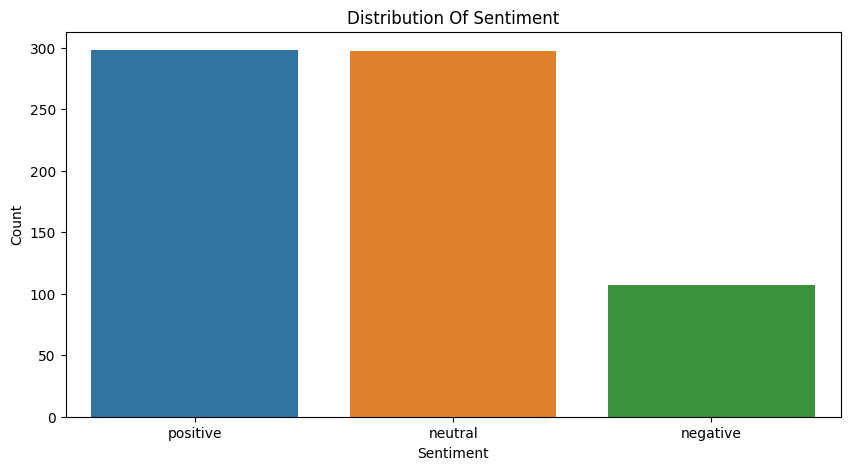

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(x=sentiment_distribution.index,
           y=sentiment_distribution.values)
plt.title("Distribution Of Sentiment")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show

# So, we can see althrough the app has low ratings, still the reviewers don't use many negative words in the reviews for the app.
Next, we'll explore the relationship between the sentiments and the ratings. This analysis can help us understand whether there is a correlation between the sentiment of the text and numerical ratings.

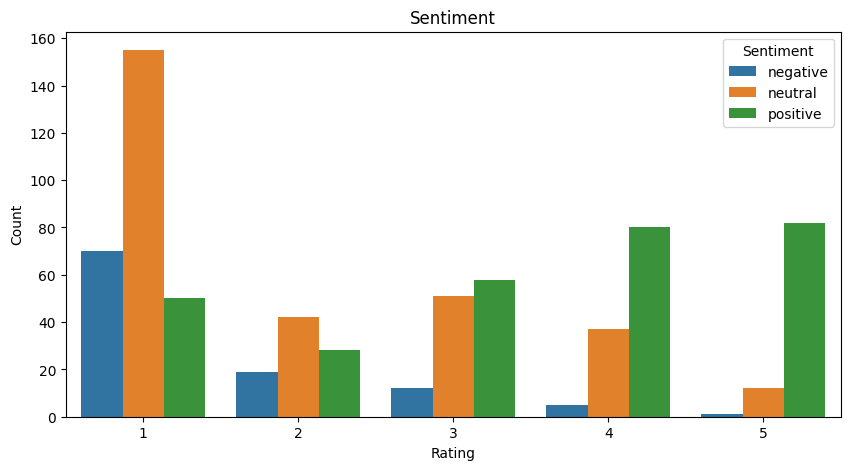

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,
    x='Rating',
    hue='Sentiment')
plt.title("Sentiment")
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Summary

app review sentiment analysis is valuable tool for app developer and business to understand user feedback,prioritize feature updates and maintain a positive user community.it involves using a data analysis techniqques to determine whether the sentiment in these reviews are positive,negative and neutral